# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

Подключим бибилиотеку 'pandas'. 

In [ ]:
import pandas as pd                                                            # импоритруем библиотеку 'pandas'

Читаем таблицу из файла и сохраняем ее в переменную.

In [ ]:
df = pd.read_csv("/datasets/real_estate_data.csv",sep = "\t")                    # читаем файл и сохраняем в переменную

Выводим 15 строк датафрейма на экран.

In [ ]:
df.head(15)                                                                    # выводим 15 строк таблицы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Описание столбцов.

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

Методом 'info()' посмотрим краткую характеристику датафрейма.

In [ ]:
df.info()                                                                   # выводим информацию о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Проверим процент пропусков.

In [ ]:
df.isna().mean()                                                             # выводим на экран процент пропусков по столбцам

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

Применим метод 'describe()' для проверки значений в столбцах.

In [ ]:
df.describe()                                                              # получаем описание значений по столбцам

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

Первоначальная проверка показала что в датасете имеются пропуски и аномальные значения.
В некоторых столбцах процент пропусков составляет более 60%. 

Из представленного датасета можно предположить что не все пропуски имеют случайный характер. Возможно такие данные изначально не были указаны ввиду отсутствия некоторых характеристик обьекта. Оставшиеся пропуски предположительно имеют технический характер(ошибка копированя или сбой в передаче данных).

Можно отметить что столбцы в датасете имеют немного хаотичную последовательность что влияет на удобство работы с данными.

## Предобработка данных

Первым делом сделаем перестановку столбцов для удобства работы.

Вызовем список столбцов.

In [ ]:
df.columns                                                                         #выводим названия столбцов

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Совершим перестановку.

In [ ]:
df = df[['locality_name', 'total_area',                                                                 
       'living_area', 'kitchen_area', 'rooms', 'balcony', 'ceiling_height', 'floors_total',  'floor',
       'is_apartment', 'studio', 'open_plan',  
       'cityCenters_nearest', 'airports_nearest', 
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'first_day_exposition', 'days_exposition','total_images','last_price']]              #изменение порядка столбцов


Проверим изменения.

In [ ]:
df.head()                                                                                     # вывод таблицы

,locality_name,total_area,living_area,kitchen_area,rooms,balcony,ceiling_height,floors_total,floor,is_apartment,...,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,total_images,last_price
0,Санкт-Петербург,108.0,51.0,25.0,3,NaN,2.70,16.0,8,NaN,...,16028.0,18863.0,1.0,482.0,2.0,755.0,2019-03-07T00:00:00,NaN,20,13000000.0
1,посёлок Шушары,40.4,18.6,11.0,1,2.0,NaN,11.0,1,NaN,...,18603.0,12817.0,0.0,NaN,0.0,NaN,2018-12-04T00:00:00,81.0,7,3350000.0
2,Санкт-Петербург,56.0,34.3,8.3,2,0.0,NaN,5.0,4,NaN,...,13933.0,21741.0,1.0,90.0,2.0,574.0,2015-08-20T00:00:00,558.0,10,5196000.0
3,Санкт-Петербург,159.0,NaN,NaN,3,0.0,NaN,14.0,9,NaN,...,6800.0,28098.0,2.0,84.0,3.0,234.0,2015-07-24T00:00:00,424.0,0,64900000.0
4,Санкт-Петербург,100.0,32.0,41.0,2,NaN,3.03,14.0,13,NaN,...,8098.0,31856.0,2.0,112.0,1.0,48.0,2018-06-19T00:00:00,121.0,2,10000000.0


Приступим к обработке пропусков.

Спрерва проверим столбец 'living_area' сгруппировав по количества комнат.

In [ ]:
df.pivot_table(index = "rooms", values ="living_area",aggfunc = ["mean","median","max","min","count"])    #группировка по количеству комнат

,mean,median,max,min,count
,living_area,living_area,living_area,living_area,living_area
rooms,,,,,
0,18.865246,18.000,68.0,2.0,183
1,17.893552,17.600,60.0,3.0,7388
2,31.736849,30.500,99.5,2.0,7296
3,47.387941,45.000,170.8,3.0,5366
4,66.983223,63.600,250.0,5.4,1089
5,100.009247,91.785,301.5,23.6,292
6,130.983636,123.900,300.0,51.0,99
7,163.564151,145.000,347.5,57.4,53


Все показатели более-меннее не вызывают отклонений но можно заметить что есть группа которая содержит 0 комнат.
Проверим эту группу. 

In [ ]:
df.query('rooms == 0')                                                    # вывод таблицы по количеству комнат равных 0

,locality_name,total_area,living_area,kitchen_area,rooms,balcony,ceiling_height,floors_total,floor,is_apartment,...,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,total_images,last_price
144,посёлок Мурино,27.00,15.50,NaN,0,2.0,NaN,24.0,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-30T00:00:00,181.0,1,2450000.0
349,деревня Кудрово,25.00,17.00,NaN,0,0.0,NaN,14.0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-09-27T00:00:00,45.0,4,2320000.0
440,Санкт-Петербург,27.11,24.75,NaN,0,2.0,NaN,17.0,4,NaN,...,15015.0,38171.0,0.0,NaN,2.0,982.0,2018-03-12T00:00:00,64.0,8,2480000.0
508,посёлок Парголово,34.40,24.30,NaN,0,1.0,NaN,26.0,19,NaN,...,19292.0,53115.0,0.0,NaN,1.0,593.0,2017-03-28T00:00:00,430.0,0,3375000.0
608,посёлок Шушары,25.00,NaN,NaN,0,NaN,NaN,10.0,7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-20T00:00:00,29.0,2,1850000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,Санкт-Петербург,26.00,18.00,NaN,0,0.0,NaN,25.0,16,NaN,...,13222.0,11405.0,0.0,NaN,1.0,623.0,2017-09-01T00:00:00,14.0,7,3200000.0
23442,посёлок Мурино,27.70,18.00,NaN,0,2.0,NaN,24.0,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-09-28T00:00:00,4.0,0,2500000.0
23554,Санкт-Петербург,26.00,NaN,NaN,0,NaN,NaN,19.0,8,NaN,...,17092.0,18090.0,0.0,NaN,2.0,112.0,2018-09-07T00:00:00,31.0,15,3350000.0
23592,Никольское,29.00,18.00,NaN,0,2.0,NaN,9.0,8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-11T00:00:00,82.0,10,1450000.0


Видим что в группе с числом комнат равных 0 присутствует жилая зона, а так же наличие балконов.
Сделаем вывод что хотя бы одна комната есть. 
Исправим эти значения и выведем уникальные значения.

In [ ]:
df.loc[(df.rooms == 0),"rooms"] = 1                                              # изменение столбца комнат с 0 на 1
df.rooms.unique()                                                                # вывод значений столбца

array([ 3,  1,  2,  4,  5,  6,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

Так как видно что нет сильных различий между медианными значениями и средними можно подставить любое. Но для большей точности применим медианное и заполним столбец. 
Применим группировку по количеству комнат.

In [ ]:
df["living_area"] = df["living_area"].fillna(df.groupby("rooms")["living_area"].transform("median"))      # заполняем пропуски сгруппировав по столбцу 'rooms'

Проверим изменения.

In [ ]:
df.living_area.isna().mean()                                   # вывод процента пропусков

0.0

Пропуски в столбце 'living_area' заполнены. 

Проверим столбец 'ceiling_height'.

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


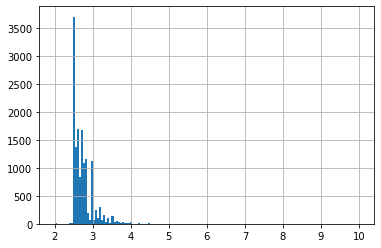

In [ ]:
print(df.ceiling_height.describe())                               # вывод описания столбца

df.ceiling_height.hist(bins = 150,range =(2,10))                  # строим гистограмму

В описание столбца и на гистограмме видно что высота потолков варьируется от 2.5 до 5 и более.
Допустим что высота потолков от 5 метров действительно существует, но тогда квартира должна находиться в одноэтажном доме или на последнем этаже.

In [ ]:
df.query('ceiling_height >=5').sort_values("ceiling_height").head(15)                   # вывод таблицы с высоты потолков от 5

,locality_name,total_area,living_area,kitchen_area,rooms,balcony,ceiling_height,floors_total,floor,is_apartment,...,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,total_images,last_price
1053,Бокситогорск,29.0,17.600,NaN,1,NaN,5.0,3.0,1,False,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-01T00:00:00,6.0,13,550000.0
464,Санкт-Петербург,280.3,159.500,21.1,6,0.0,5.2,8.0,7,NaN,...,6655.0,26316.0,3.0,187.0,1.0,616.0,2015-06-11T00:00:00,578.0,15,66571000.0
12628,Санкт-Петербург,50.0,17.600,NaN,1,NaN,5.3,5.0,5,NaN,...,3918.0,19644.0,1.0,505.0,1.0,92.0,2018-03-29T00:00:00,8.0,14,3900000.0
1026,Санкт-Петербург,310.0,190.000,63.0,5,2.0,5.3,3.0,3,NaN,...,4785.0,24899.0,0.0,NaN,1.0,603.0,2018-10-12T00:00:00,NaN,20,155000000.0
7578,Санкт-Петербург,143.0,83.000,29.0,3,1.0,5.5,5.0,5,NaN,...,6448.0,26333.0,3.0,479.0,0.0,NaN,2017-11-02T00:00:00,NaN,17,38000000.0
1388,Санкт-Петербург,399.0,91.785,NaN,5,0.0,5.6,6.0,6,NaN,...,6934.0,26204.0,2.0,149.0,2.0,577.0,2015-01-21T00:00:00,719.0,20,59800000.0
21227,Санкт-Петербург,71.0,68.000,NaN,1,0.0,5.8,5.0,5,NaN,...,1261.0,20170.0,2.0,295.0,3.0,366.0,2017-07-21T00:00:00,30.0,0,8200000.0
20264,Санкт-Петербург,187.6,147.000,15.6,4,NaN,6.0,7.0,7,NaN,...,5605.0,26902.0,3.0,484.0,1.0,305.0,2017-07-10T00:00:00,259.0,17,119000000.0
3474,деревня Нурма,30.0,15.300,7.3,1,NaN,8.0,5.0,2,False,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-16T00:00:00,125.0,3,1400000.0
15743,Санкт-Петербург,67.0,41.000,8.0,3,NaN,8.0,16.0,1,NaN,...,11035.0,32691.0,1.0,723.0,0.0,NaN,2016-11-11T00:00:00,474.0,14,5600000.0


Из таблицы видно что аномальные значения начинаются от высоты потолков 6 метров. Видно что этаж не первый и не последний и площадь таких квартир аномально маленькая.
Эти значения логично подвести под стандартные.

Строить медианные значения высоты потолков основываясь на каких-то значениях других столбцов не имеет смысла потому что нет явной зависимости. 

Заполним пропуски медианным значением и исправим аномальные значения.

In [ ]:
df["ceiling_height"] = df["ceiling_height"].fillna(df["ceiling_height"].median())             #заполнение пропусков медианным значением
df.loc[(df["ceiling_height"] > 6),"ceiling_height"] = df["ceiling_height"].median()           #изменение аномалий
df.loc[(df["ceiling_height"] < 2),"ceiling_height"] = df["ceiling_height"].median()           #изменение аномалий

print(df.ceiling_height.unique())                                                             #вывод значений

df.ceiling_height.isna().mean()                                                               #вывод количества пропусков

[2.7  2.65 3.03 2.5  2.67 2.56 3.05 2.75 2.6  2.9  2.8  2.55 3.   3.2
 2.61 3.25 3.45 2.77 2.85 2.64 2.57 4.15 3.5  3.3  2.71 4.   2.47 2.73
 2.84 3.1  2.34 3.4  3.06 2.72 2.54 2.51 2.78 2.76 2.58 3.7  2.52 5.2
 2.87 2.66 2.59 2.   2.45 3.6  2.92 3.11 3.13 3.8  3.15 3.55 3.16 3.62
 3.12 2.53 2.74 2.96 2.46 5.3  5.   2.79 2.95 4.06 2.94 3.82 3.54 3.53
 2.83 4.7  2.4  3.38 3.01 5.6  3.65 3.9  3.18 3.35 2.3  3.57 2.48 2.62
 2.82 3.98 2.63 3.83 3.52 3.95 3.75 2.88 3.67 3.87 3.66 3.85 3.86 4.19
 3.24 4.8  4.5  4.2  3.36 3.08 3.68 3.07 3.37 3.09 3.26 3.34 2.81 3.44
 2.97 3.14 4.37 2.68 3.22 3.27 4.1  2.93 3.46 3.47 3.33 3.63 3.32 2.98
 2.86 3.17 4.4  3.28 3.04 4.45 5.5  3.84 3.23 3.02 3.21 3.43 3.78 4.3
 3.39 2.69 3.31 4.65 3.56 2.2  3.51 3.93 3.42 2.99 3.49 4.14 2.91 3.88
 4.25 3.29 2.25 3.76 3.69 6.   2.89 3.58 5.8  2.49 4.9  3.48 3.59]


0.0

Пропуски заполнены и скорректированны аномальные значения.

Проверим пропуски в столбце 'floors_total'.
Выведем таблицу отсортировав по пропускам в этом столбце.

In [ ]:
df.query('floors_total.isna()')                                                        #выводим таблицу с сортировкой по пропускам в столбце

,locality_name,total_area,living_area,kitchen_area,rooms,balcony,ceiling_height,floors_total,floor,is_apartment,...,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,total_images,last_price
186,Санкт-Петербург,65.2,30.80,12.00,2,NaN,2.65,NaN,4,NaN,...,12373.0,39197.0,1.0,123.0,0.0,NaN,2018-10-02T00:00:00,49.0,12,11640000.0
237,Санкт-Петербург,28.1,20.75,NaN,1,0.0,2.65,NaN,1,NaN,...,17369.0,22041.0,0.0,NaN,1.0,374.0,2016-11-23T00:00:00,251.0,4,2438033.0
457,Санкт-Петербург,70.8,38.40,10.63,2,0.0,2.65,NaN,12,NaN,...,8322.0,37364.0,2.0,309.0,2.0,706.0,2015-08-01T00:00:00,727.0,4,9788348.0
671,Санкт-Петербург,93.6,47.10,16.80,3,0.0,2.65,NaN,8,NaN,...,17369.0,22041.0,0.0,NaN,1.0,374.0,2017-04-06T00:00:00,123.0,4,6051191.0
1757,Санкт-Петербург,39.0,17.60,NaN,1,0.0,2.65,NaN,9,NaN,...,11618.0,22735.0,1.0,835.0,1.0,652.0,2017-04-22T00:00:00,77.0,5,3600000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,Санкт-Петербург,63.5,30.50,NaN,2,NaN,2.80,NaN,3,NaN,...,15363.0,51340.0,0.0,NaN,1.0,853.0,2017-05-24T00:00:00,512.0,5,8500000.0
22656,Санкт-Петербург,64.5,31.70,14.40,2,0.0,2.65,NaN,20,NaN,...,17369.0,22041.0,0.0,NaN,1.0,374.0,2017-04-02T00:00:00,127.0,4,4574160.0
22808,Санкт-Петербург,110.4,45.38,23.42,3,0.0,2.65,NaN,6,NaN,...,4529.0,19095.0,0.0,NaN,0.0,NaN,2016-11-20T00:00:00,260.0,0,14569263.0
23590,Санкт-Петербург,123.3,50.40,23.60,3,0.0,2.65,NaN,18,NaN,...,4529.0,19095.0,0.0,NaN,0.0,NaN,2017-04-25T00:00:00,104.0,0,21187872.0


Согласно таблце можно сказать что пропущеные значения в столбце появились не из-за отсутствия этажности, а в ходе сбоя данных. 

Т.к. количество пропусков в этом столбце составляет небольшую долю можно их просто удалить.

In [ ]:
df = df.dropna(subset = ["floors_total"])                                                        #удаление пропусков 

df.floors_total.isna().mean()                                                                    #проверка доли пропусков

0.0

Проверим столбец 'is_apartment' на уникальные значения.

In [ ]:
df.is_apartment.unique()                                                                  #вывод уникальных значений

array([nan, False, True], dtype=object)

В столбце находятся булевые значения и пропуски.

Выведем таблицу на экран возможно удастся найти зависимость от других столбцов.

In [ ]:
df.query("is_apartment == True")                                                         #вывод таблицы по столбцу  'is_apartment' со знчением True

,locality_name,total_area,living_area,kitchen_area,rooms,balcony,ceiling_height,floors_total,floor,is_apartment,...,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,total_images,last_price
543,Петергоф,56.60,29.400000,NaN,2,NaN,3.50,3.0,1,True,...,30437.0,35248.0,3.0,53.0,3.0,22.0,2018-11-06T00:00:00,NaN,11,12790000.0
916,Санкт-Петербург,70.00,40.000000,NaN,2,2.0,3.12,3.0,3,True,...,21729.0,45796.0,0.0,NaN,1.0,754.0,2018-01-11T00:00:00,179.0,11,8183000.0
1109,Санкт-Петербург,95.80,58.300000,20.00,2,1.0,2.65,6.0,5,True,...,318.0,21860.0,2.0,160.0,3.0,569.0,2014-12-09T00:00:00,1572.0,1,34878556.0
1608,Санкт-Петербург,20.10,17.600000,NaN,1,NaN,2.65,9.0,1,True,...,12147.0,26646.0,0.0,NaN,0.0,NaN,2019-01-30T00:00:00,13.0,12,2150000.0
2759,Всеволожск,152.00,45.000000,NaN,3,1.0,3.00,3.0,1,True,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-27T00:00:00,7.0,11,7500000.0
2975,Санкт-Петербург,42.90,20.390000,10.29,1,NaN,3.15,4.0,3,True,...,20802.0,44870.0,0.0,NaN,1.0,792.0,2018-07-23T00:00:00,273.0,9,4931398.0
3067,Выборг,95.00,45.000000,25.00,2,2.0,4.50,7.0,7,True,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-08T00:00:00,96.0,13,6600000.0
3816,Санкт-Петербург,53.10,19.800000,15.90,1,2.0,2.65,13.0,6,True,...,4516.0,19396.0,0.0,NaN,1.0,826.0,2016-05-16T00:00:00,60.0,4,4779000.0
3951,Санкт-Петербург,50.00,17.000000,12.00,1,2.0,3.00,11.0,9,True,...,11367.0,10143.0,0.0,NaN,0.0,NaN,2019-04-20T00:00:00,NaN,10,4300000.0
4339,Санкт-Петербург,72.00,70.000000,NaN,3,NaN,3.50,4.0,1,True,...,4466.0,31487.0,2.0,353.0,1.0,439.0,2019-03-25T00:00:00,22.0,19,6900000.0


Видно что особой зависимости нет, вероятно пропуски в столбце являются таковыми потому что объекты не является апартаментами. 

Заполним пропуски значением 'False'.

In [ ]:
df["is_apartment"] = df["is_apartment"].fillna(False)                                        #заполнение пропусков

df.is_apartment.isna().mean()                                                                #вывод процента пропусков

0.0

Пропуски заполнены.


Перейдём к заполнению пропусков в столбце 'kitchen_area'.
Сгруппируем данные по столбцу 'rooms'.

In [ ]:
df.pivot_table(index = "rooms", values ="kitchen_area",aggfunc = ["mean","median","max","min","count"])    #группировка по количеству комнат

,mean,median,max,min,count
,kitchen_area,kitchen_area,kitchen_area,kitchen_area,kitchen_area
rooms,,,,,
1,9.548692,9.00,58.4,1.3,7203
2,9.974912,8.70,93.0,2.0,7270
3,11.293906,9.50,107.0,4.0,5369
4,13.663009,11.05,77.0,4.8,1080
5,18.367649,15.10,66.0,5.0,285
6,21.098229,19.75,56.0,5.9,96
7,21.998077,20.00,70.0,5.0,52
8,24.866667,25.00,45.0,5.0,9


Все значения в норме. Для  заполнения пропусков будем исползовать медианные значения сгруппировав по количеству комнат. Проверим изменения.


In [ ]:
df["kitchen_area"] = df["kitchen_area"].fillna(df.groupby("rooms")["kitchen_area"].transform("median"))      # заполняем пропуски сгруппировав по столбцу 'rooms'
df.kitchen_area.isna().mean()                                                                                #вывод доли пропусков

0.0

Далее обработаем столбец 'balcony'. 

Сразу можно предположить что пропуски в столбце имеют не технический характер а изначально болкон не был указан из-за его отсутствия. Проверим уникальные значения.

In [ ]:
df.balcony.unique()                                                                          #вывод уникальных значений

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Как видно что кто-то указал отсутствие балкона,а кто-то нет. Аномальные значения тоже отсутствуют.

Заполним пропуски в столбце значением 0 и проверим изменения.

In [ ]:
df["balcony"] = df["balcony"].fillna(0)                                                 #заполнение пропусков
df.balcony.isna().mean()                                                                #вывод доли пропусков

0.0

Приступим к проверке столбца 'locality_name'. 
Выведем таблицу отсортировав по пропускам в столбце.

In [ ]:
df.query('locality_name.isna()').head(10)                                              #вывод таблицы с пропусками

,locality_name,total_area,living_area,kitchen_area,rooms,balcony,ceiling_height,floors_total,floor,is_apartment,...,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,total_images,last_price
1097,NaN,81.7,50.80,8.80,3,0.0,3.55,5.0,2,False,...,4258.0,23478.0,0.0,NaN,0.0,NaN,2016-04-15T00:00:00,147.0,3,8600000.0
2033,NaN,80.0,42.60,18.60,3,0.0,2.65,4.0,2,False,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-05-30T00:00:00,34.0,6,5398000.0
2603,NaN,42.7,15.60,10.70,1,0.0,2.65,24.0,3,False,...,17369.0,22041.0,0.0,NaN,1.0,374.0,2015-09-20T00:00:00,276.0,20,3351765.0
2632,NaN,62.4,33.10,8.20,2,0.0,2.65,24.0,21,False,...,17369.0,22041.0,0.0,NaN,1.0,374.0,2015-10-11T00:00:00,256.0,2,5130593.0
3574,NaN,46.5,30.80,6.50,2,0.0,2.65,5.0,5,False,...,8127.0,27419.0,0.0,NaN,1.0,603.0,2016-05-28T00:00:00,45.0,10,4200000.0
4151,NaN,89.5,39.62,13.38,2,0.0,3.00,8.0,7,False,...,3902.0,25054.0,1.0,485.0,3.0,722.0,2014-12-09T00:00:00,869.0,17,17600000.0
4189,NaN,80.0,52.30,10.40,3,0.0,4.00,4.0,3,False,...,3039.0,21774.0,1.0,690.0,1.0,953.0,2015-12-10T00:00:00,223.0,7,9200000.0
4670,NaN,83.0,45.00,9.50,3,0.0,2.65,7.0,6,False,...,5382.0,26534.0,1.0,446.0,1.0,376.0,2015-08-14T00:00:00,350.0,1,5500000.0
5343,NaN,85.5,59.10,8.30,3,4.0,2.65,7.0,5,False,...,9538.0,10556.0,1.0,67.0,0.0,NaN,2016-01-20T00:00:00,303.0,19,13540000.0
5707,NaN,30.0,20.00,9.00,1,0.0,2.65,24.0,23,False,...,16788.0,21460.0,0.0,NaN,1.0,170.0,2016-04-29T00:00:00,49.0,7,3700000.0


Данные из таблицы не позволяют точно установить местонахождение квартиры.
Т.к. пропусков в столбце мало, можно их удалить.

In [ ]:
df = df.dropna(subset = ["locality_name"])                                                        #удаление пропусков 

df.locality_name.isna().mean()                                                                    #проверка доли пропусков

0.0

Пропуски удалены.

Перейдем к столбцу 'cityCenters_nearest'.
Выведем таблицу сгруппировав по пропущенным значениям.

In [ ]:
df.query('cityCenters_nearest.isna()').head(15)                                           #вывод таблицы с пропусками

,locality_name,total_area,living_area,kitchen_area,rooms,balcony,ceiling_height,floors_total,floor,is_apartment,...,cityCenters_nearest,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,total_images,last_price
5,городской посёлок Янино-1,30.40,14.40,9.10,1,0.0,2.65,12.0,5,False,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-10T00:00:00,55.0,10,2890000.0
8,посёлок Мурино,33.16,15.43,8.81,1,0.0,2.65,27.0,26,False,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-23T00:00:00,189.0,20,2900000.0
12,Сертолово,54.00,30.00,9.00,2,0.0,2.65,5.0,5,False,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-06-30T00:00:00,90.0,10,3890000.0
22,деревня Кудрово,58.00,30.00,11.00,2,2.0,2.75,25.0,15,False,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-04-24T00:00:00,60.0,20,5000000.0
30,Коммунар,32.80,17.60,9.00,1,0.0,2.65,9.0,2,False,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-19T00:00:00,63.0,12,2200000.0
37,поселок городского типа Красный Бор,45.80,30.50,8.70,2,0.0,2.50,5.0,1,False,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-10-28T00:00:00,196.0,10,1990000.0
38,посёлок Мурино,40.00,16.30,11.60,1,0.0,2.75,18.0,9,False,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-29T00:00:00,103.0,10,3150000.0
47,Гатчина,56.10,42.50,5.70,3,1.0,2.65,4.0,3,False,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-18T00:00:00,179.0,17,3600000.0
60,посёлок Мурино,35.00,17.60,9.00,1,0.0,2.65,12.0,8,False,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01T00:00:00,11.0,3,2740000.0
62,Сертолово,78.60,48.80,11.90,3,2.0,2.80,9.0,5,False,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-09-17T00:00:00,5.0,0,4800000.0


Видим что при выводе пропусков из столбца 'cityCenters_nearest' во всех строках также отсутствуют значения столбцов 'airports_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest'. В некоторой степени эти столбцы созависимые. 
Заполнение каких либо значений из перечисленных столбцов невозможно из-за отсутствия достаточных данных. Следовательно оставим пропущенные значения во всех столцах без изменений.

В оставшемся столбце 'days_exposition' можно предположить имеющиеся пропуски означают отсутствие дня сдачи в аренду. Т.е. объявление еще действует и квартира не сдана. Такие пропуски оставим без изменений.
 

Приступим к изменению типов данных где это необходимо.
Выведем информацию о датафрейме ещё раз.

In [ ]:
df.info()                                                                         #вывод информации о датафрейме

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
locality_name           23565 non-null object
total_area              23565 non-null float64
living_area             23565 non-null float64
kitchen_area            23565 non-null float64
rooms                   23565 non-null int64
balcony                 23565 non-null float64
ceiling_height          23565 non-null float64
floors_total            23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
cityCenters_nearest     18064 non-null float64
airports_nearest        18041 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_around3000        18065 non-null float64
ponds_nearest           9036 non-null float64
first_day_exposition    23565 non-null object
days_exposition

Согласно описанию таблицы в некоторых столбцах есть типы данных требующие изменения. К таким столбцам можно отнести 'balcony', 'floors_total', 'last_price' и 'first_day_exposition'. В остальных столбцах из-за того что есть пропущенные значения тип данных соответствует.

Изменим типы данных на нужные и выведем информацию.

In [ ]:
df['balcony'] = df['balcony'].astype("int")
df['floors_total'] = df['floors_total'].astype("int")
df['last_price'] = df['last_price'].astype("int")
df['first_day_exposition'] = pd.to_datetime(df["first_day_exposition"],format = '%Y-%m-%dT%H:%M:%S')        #изменение типов данных
df.info()                                                                             #вывод информации о датафрейме

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
locality_name           23565 non-null object
total_area              23565 non-null float64
living_area             23565 non-null float64
kitchen_area            23565 non-null float64
rooms                   23565 non-null int64
balcony                 23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null int64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
cityCenters_nearest     18064 non-null float64
airports_nearest        18041 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_around3000        18065 non-null float64
ponds_nearest           9036 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
days_exposi

Все типы данных изменены на нужные.

**Краткие выводы**

В ходе предобработки датафрейма возникли вопросы по заполнению пропущенных значений по которым можно дать краткую информацию.

Пропуски содержащиеся в таблице имеют по большей части технический характер, они могли образоваться путем переноса данных или сбоем копирования. Также имеються пропуски которые образованы из-за отсутствия некоторых характеристик объекта и такие данные просто не были вписаны. Часть пропусков было обработано,часть удалена,а часть оставлена без изменения по пречине недостаточности информации для заполнения, что приведёт к некорректным выводам.

В таблице имелись несоответствия типов данных которые были изменены. Некоторые типы данных были неправильные из-за содержащихся в них пропусках, некоторые были написаны в неправильном фомате.

## Расчёты и добавление результатов в таблицу

Добавим столбец с ценой за один квадратный метр.

In [ ]:
df["meter_price"] = df["last_price"] / df["total_area"]                                  #добавление столбца с ценой за метр

Проверим изменения, выведем таблицу на экран.

In [ ]:
df.head()                                                                      #вывод таблицы на экран

,locality_name,total_area,living_area,kitchen_area,rooms,balcony,ceiling_height,floors_total,floor,is_apartment,...,airports_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,total_images,last_price,meter_price
0,Санкт-Петербург,108.0,51.0,25.0,3,0,2.70,16,8,False,...,18863.0,1.0,482.0,2.0,755.0,2019-03-07,NaN,20,13000000,120370.370370
1,посёлок Шушары,40.4,18.6,11.0,1,2,2.65,11,1,False,...,12817.0,0.0,NaN,0.0,NaN,2018-12-04,81.0,7,3350000,82920.792079
2,Санкт-Петербург,56.0,34.3,8.3,2,0,2.65,5,4,False,...,21741.0,1.0,90.0,2.0,574.0,2015-08-20,558.0,10,5196000,92785.714286
3,Санкт-Петербург,159.0,45.0,9.5,3,0,2.65,14,9,False,...,28098.0,2.0,84.0,3.0,234.0,2015-07-24,424.0,0,64900000,408176.100629
4,Санкт-Петербург,100.0,32.0,41.0,2,0,3.03,14,13,False,...,31856.0,2.0,112.0,1.0,48.0,2018-06-19,121.0,2,10000000,100000.000000


Добавим столбцы с днём недели, месяцем и годом.

In [ ]:
df["weekday"] = df["first_day_exposition"].dt.dayofweek                            #добавление столбца с днём недели
df["month"] = df["first_day_exposition"].dt.month                                  #добавление столбца с месяцем
df["year"] = df["first_day_exposition"].dt.year                                    #добавление столбца с годом

Проверим добавленные столбцы выводом таблицы.

In [ ]:
df.head()                                                                        #вывод таблицы не экран

,locality_name,total_area,living_area,kitchen_area,rooms,balcony,ceiling_height,floors_total,floor,is_apartment,...,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,total_images,last_price,meter_price,weekday,month,year
0,Санкт-Петербург,108.0,51.0,25.0,3,0,2.70,16,8,False,...,2.0,755.0,2019-03-07,NaN,20,13000000,120370.370370,3,3,2019
1,посёлок Шушары,40.4,18.6,11.0,1,2,2.65,11,1,False,...,0.0,NaN,2018-12-04,81.0,7,3350000,82920.792079,1,12,2018
2,Санкт-Петербург,56.0,34.3,8.3,2,0,2.65,5,4,False,...,2.0,574.0,2015-08-20,558.0,10,5196000,92785.714286,3,8,2015
3,Санкт-Петербург,159.0,45.0,9.5,3,0,2.65,14,9,False,...,3.0,234.0,2015-07-24,424.0,0,64900000,408176.100629,4,7,2015
4,Санкт-Петербург,100.0,32.0,41.0,2,0,3.03,14,13,False,...,1.0,48.0,2018-06-19,121.0,2,10000000,100000.000000,1,6,2018


Добавим столбец с этажностью с вариантами - первый, последний,другой.

Напишем функцию 'where_floor' и применим её к таблице.

In [ ]:
def where_floor(row):
    if(row["floor"] == 1):
        row["where_floor"] = "первый"
    elif (row["floor"] > 1 and row["floor"] == row["floors_total"]):
        row["where_floor"] = "последний"
    else:
        row["where_floor"] = "другой"
    
    return row                                                                     #функция заполнения значений
                                                                               

df = df.apply(where_floor, axis=1)                                                 #применение функции к таблице

Проверим получившиеся значения.

In [ ]:
df.head()                                                                          #вывод таблицы на экран

,locality_name,total_area,living_area,kitchen_area,rooms,balcony,ceiling_height,floors_total,floor,is_apartment,...,ponds_nearest,first_day_exposition,days_exposition,total_images,last_price,meter_price,weekday,month,year,where_floor
0,Санкт-Петербург,108.0,51.0,25.0,3,0,2.70,16,8,False,...,755.0,2019-03-07,NaN,20,13000000,120370.370370,3,3,2019,другой
1,посёлок Шушары,40.4,18.6,11.0,1,2,2.65,11,1,False,...,NaN,2018-12-04,81.0,7,3350000,82920.792079,1,12,2018,первый
2,Санкт-Петербург,56.0,34.3,8.3,2,0,2.65,5,4,False,...,574.0,2015-08-20,558.0,10,5196000,92785.714286,3,8,2015,другой
3,Санкт-Петербург,159.0,45.0,9.5,3,0,2.65,14,9,False,...,234.0,2015-07-24,424.0,0,64900000,408176.100629,4,7,2015,другой
4,Санкт-Петербург,100.0,32.0,41.0,2,0,3.03,14,13,False,...,48.0,2018-06-19,121.0,2,10000000,100000.000000,1,6,2018,другой


Напишем два столбца соотношений площадей.
Первый соотношение жилой площади и общей.
Второй соотношение кухни и общей площади.

In [ ]:
df["total_living_area"] = df["living_area"] / df["total_area"]                            #заполнение столбцов
df["total_kitchen_area"] = df["kitchen_area"] / df["total_area"]

Выведем значения на экран.

In [ ]:
df.head()                                                                                 #вывод таблицы на экран

,locality_name,total_area,living_area,kitchen_area,rooms,balcony,ceiling_height,floors_total,floor,is_apartment,...,days_exposition,total_images,last_price,meter_price,weekday,month,year,where_floor,total_living_area,total_kitchen_area
0,Санкт-Петербург,108.0,51.0,25.0,3,0,2.70,16,8,False,...,NaN,20,13000000,120370.370370,3,3,2019,другой,0.472222,0.231481
1,посёлок Шушары,40.4,18.6,11.0,1,2,2.65,11,1,False,...,81.0,7,3350000,82920.792079,1,12,2018,первый,0.460396,0.272277
2,Санкт-Петербург,56.0,34.3,8.3,2,0,2.65,5,4,False,...,558.0,10,5196000,92785.714286,3,8,2015,другой,0.612500,0.148214
3,Санкт-Петербург,159.0,45.0,9.5,3,0,2.65,14,9,False,...,424.0,0,64900000,408176.100629,4,7,2015,другой,0.283019,0.059748
4,Санкт-Петербург,100.0,32.0,41.0,2,0,3.03,14,13,False,...,121.0,2,10000000,100000.000000,1,6,2018,другой,0.320000,0.410000


## Исследовательский анализ данных

**Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.**

Построим гистограмму для высоты потолков.

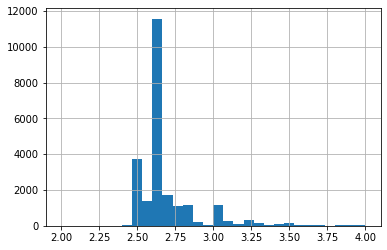

In [ ]:
df["ceiling_height"].hist(bins = 30, range = (2,4))                                          #вывод гистограммы

Гистограмма показывает чтов основном высота потолков от 2.5 до 3 метров. Значение потолков 2.65 показывает что это пиковое значение,  и что количество квартир выше этой высоты идет на убыль.

Гимтограмма для цены.

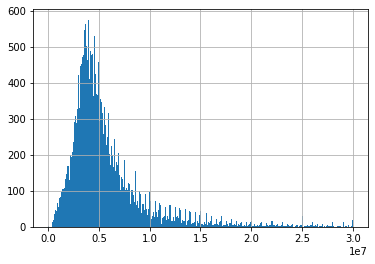

In [ ]:
df["last_price"].hist(bins = 300,range =(0,30000000))                                        #вывод гистограммы

Из гистограммы видно что прослеживается нормальное распределение.  Максимальное количество квартир продаются за цену от 3-5 миллионов.

Построим гистограмму для количества комнат.

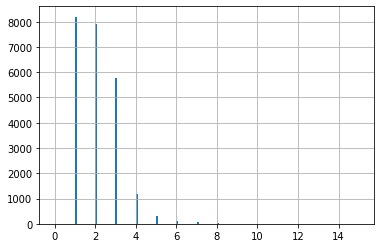

In [ ]:
df["rooms"].hist(bins = 150, range = (0,15))                                                 #вывод гистограммы

Комнаты нaчинаються со значения 1 и постепенно идут на спад. Больше всего однокомнатных, двухкомнатных  и трёхкомнатных квартир.

Построим гистограмму для общей площади.

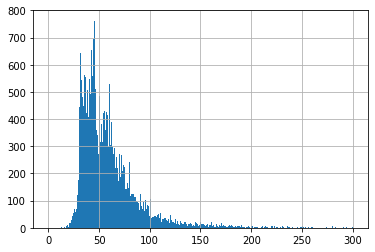

In [ ]:
df["total_area"].hist(bins = 300, range = (0,300))                                          #вывод гистограммы

График показывает что площадь квартир начинается с ~20 квадратных метров, резкий скачёк происходит на 30 кв.м и на 50 кв.м идёт плавно на спад. 

**Вывод**

Из графиков можно сделать вывод что на рынке преобладает однокомнатные - трёхкомнатные квартиры с высотой потолков 2.5 - 2.8 метров, площадью от 30 до 50 кв.м и ценой от 3 до 5 миллионов.

**Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?**

Построим гистограмму показывающую количество времени продажи квартиры.

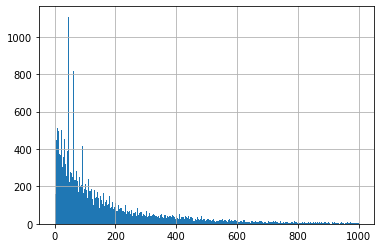

In [ ]:
df["days_exposition"].hist(bins = 300, range = (0,1000))                                  #вывод гистограммы

График показывает плавный спад по времени сдачи квартиры. Имеються 2 выброса на 45 днях и на 60.

Узнаем среднюю и медиану.

In [ ]:
df["days_exposition"].describe()                                                         #вовод описания столбца

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Медиана - 95
Средняя - 180

Также построим диограмму размаха для наглядности

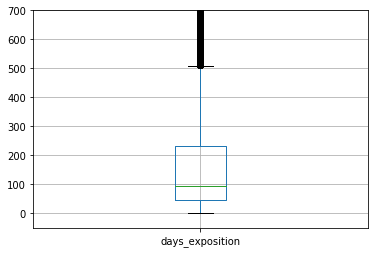

In [ ]:
import matplotlib.pyplot as plt                                                         #подключение библиотеки matplotlib

plt.ylim(-50,700)                                                                       #установление лимита по оси y
df.boxplot("days_exposition")                                                           #вывод диаграммы размаха

**Вывод**

Сделаем вывод что нормальные показатели для сдачи квартиры в диапазоне от 45 до 232 дней. 
К быстрым продажам можно отрести те которые были совершены до 45 дней, а к долгим от 232, при этом к критически долгим относятся те которые продаются от 500 дней.

**Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.**

Редкие и выбивающиеся значения были обработаны на этапе предобработки. К ним можно отнести нулевое количество комнат. высоту потолков в 1 метр и высоту потолков от 8 до 100м.
Другие значения близки к действительности.

**Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.**

Для определения зависимости посроим диаграммы рассеяния. Они будут нагляднее всего.

Проверим зависимость цены от площади квартиры.

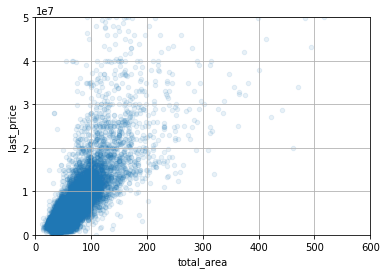

In [ ]:
df.plot(x = "total_area", y = "last_price", kind = "scatter", grid = True, alpha = 0.1, ylim = (0,50000000),xlim = (0,600))              #вывод диаграммы рассеяния     

In [ ]:
df["last_price"].corr(df["total_area"])                                           # вывод корреляции

0.6536213939252806

Из диаграммы видно что существует положительная зависимость между ценой и площадью, что подтверждается методом 'corr()'. зависимость исчезает при площади ~150 и цене в 15 миллионов. Значения выходящие за эту диаграмму можно считать аномалиями.

Построим диаграмму зависимости цены от количества комнат.

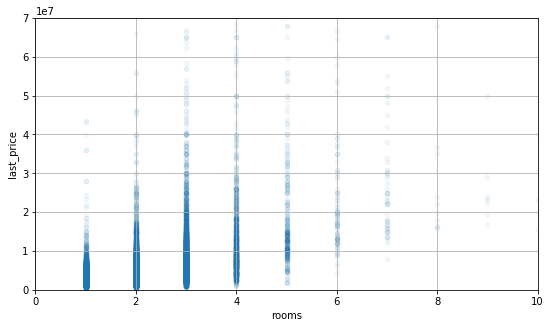

In [ ]:
df.plot(x = "rooms", y = "last_price", kind = "scatter", grid = True, alpha = 0.05, figsize= (9,5), ylim = (0,70000000),xlim=(0,10))   #вывод диаграммы рассеяния

In [ ]:
df["last_price"].corr(df["rooms"])                                             #вывод корреляции

0.36504616156058495

Зависимость близкая к 0. Из графика видно что цены на квартиры от 1 до 3 комнат колеблятся от 0 до 15 миллионов, потом с увеличением комнат цены тоже идут вверх что указывает на нелинейную зависимость.

Построим диаграмму зависимости цены от центра.

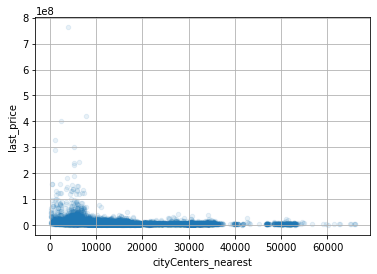

In [ ]:
df.plot.scatter(x = "cityCenters_nearest", y = "last_price", grid = True, alpha = 0.1)             #вывод диаграммы рассеяния

In [ ]:
df["last_price"].corr(df["cityCenters_nearest"])                                #вывод корреляции

-0.2063531426431107

Из диаграммы видно что пирсутствует отрицательная зависимость близкая к 0. Большинство значений расположились в одну линию. Есть небольшой всплеск цен в удалении от 0 до 8000 м от центра.

Построим диаграмму зависимости цены от этжности.

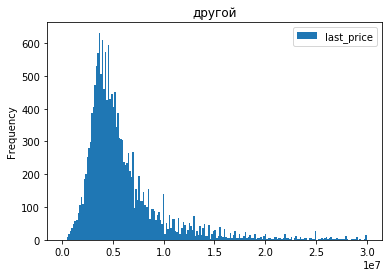

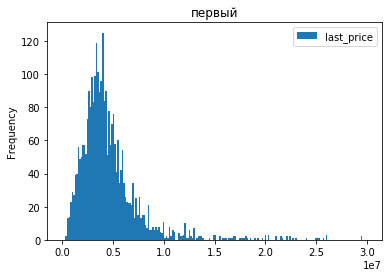

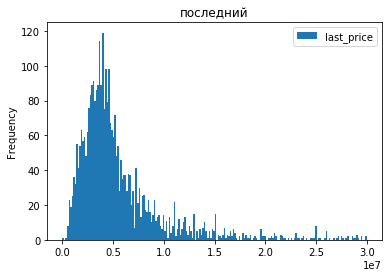

In [ ]:
for name, group_data in df.groupby("where_floor"):                                              #вывод гистограмм
    group_data.plot(y = "last_price",title = name,kind = "hist",bins = 200, range = (0,30000000))

На графиках видно что нет явной зависимости от этажности. На всех этажах нормальное распределение.

Построим графики зависимости цены от дня недели, месяца и года.

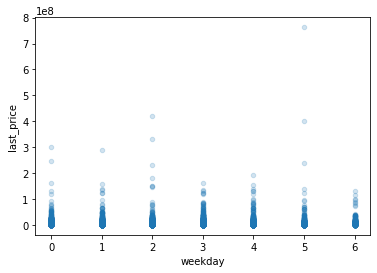

In [ ]:
df.plot.scatter(y = 'last_price', x = "weekday", alpha = 0.2)                            #вывод диаграммы рассеяния

In [ ]:
df["last_price"].corr(df["weekday"])                                                   #вывод корреляции

0.0013569211122710775

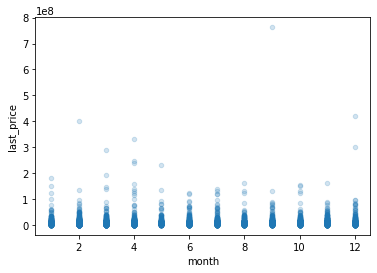

In [ ]:
df.plot.scatter(y = 'last_price', x = "month", alpha = 0.2)                            #вывод диаграммы рассеяния

In [ ]:
df["last_price"].corr(df["month"])                                                    #вывод корреляции

0.0027259571647347603

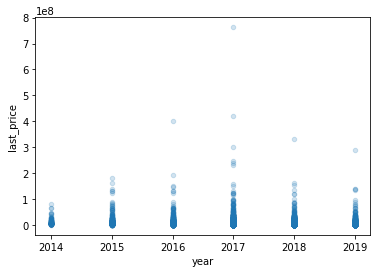

In [ ]:
df.plot.scatter(y = 'last_price', x = "year", alpha = 0.2)                            #вывод диаграммы рассеяния

In [ ]:
df["last_price"].corr(df["year"])                                                     #вывод корреляции

-0.042864152713611034

На всех трех диаграммах заисимость 0. Никакие из вышеперечисленных значений не влияют на цену квартир.

Построим диаграмму зависимости цены от цены за квадратный метр.

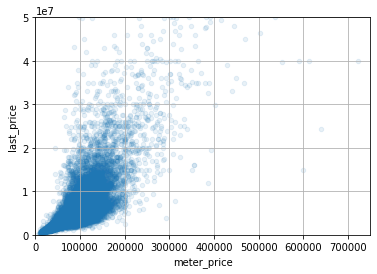

In [ ]:
df.plot.scatter(x = "meter_price",y = "last_price", alpha = 0.1, grid = True, xlim = (0,750000), ylim = (0,50000000))     #вывод диаграммы рассеяния

In [ ]:
df["last_price"].corr(df["meter_price"])                                           #вывод корреляции

0.7367985230344813

На диаграмме видно что существует зависимость от цены за квадратный метр. Разброс начинается при значениях 200000 за квадратный метр и цену в 2 миллиона.

**Вывод**

По построенным диаграммам можно заключить что большее влияние на цену имеет площадь квартиры и цена за квадратный метр. Никак не влияет на цену день недели, месяц и год. 

**Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.**

Выведем на экран таблицу из 10 населенных пунктов  с количеством объявлений и средней ценой за квадратный метр.

In [ ]:
df.pivot_table(index = "locality_name", values = "meter_price", aggfunc = ["count","mean"]).sort_values(("count","meter_price"), ascending = False).head(10)    #вывод 10 городов сгруппированных по числу объявлений

,count,mean
,meter_price,meter_price
locality_name,,
Санкт-Петербург,15651,114868.877341
посёлок Мурино,520,85673.259928
посёлок Шушары,439,78551.344545
Всеволожск,398,68654.473986
Пушкин,369,103125.819291
Колпино,338,75424.579098
посёлок Парголово,327,90175.913458
Гатчина,307,68746.146763


Выведем на экран населённые пункты с минимальныной и максимально стоимостью жилья.

In [ ]:
df.pivot_table(index = "locality_name", values = "last_price", aggfunc = ["count","min","max"]).sort_values(("count","last_price"), ascending = False).head(10)    #вывод 10 городов сгруппированных по числу объявлений

,count,min,max
,last_price,last_price,last_price
locality_name,,,
Санкт-Петербург,15651,12190,763000000
посёлок Мурино,520,1730000,8500000
посёлок Шушары,439,1500000,10990000
Всеволожск,398,965780,24412900
Пушкин,369,1990000,42000000
Колпино,338,2100000,36900000
посёлок Парголово,327,1400000,9140000
Гатчина,307,850000,13900000


**Вывод**

Из таблицы видно что в Санкт-Петербурге самое большое количество объявлений из 10 городов, также средняя стоимость квадратного метра составляет 117 тысяч. Минимальная и максимальная стоимость жилья совпали в Санкт-Петербурге.

**Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.**

Создадим переменную и поместим туда те квартиры которые находятся в Санкт-Петербурге.
Создадим столбец с расстоянием в километрах и округлим.

In [ ]:
spb_df = df.query('locality_name == "Санкт-Петербург"').copy()                                 #создание переменной
spb_df["cityCenter_km"] = (spb_df["cityCenters_nearest"] / 1000).round()                       #изменение единицы измерения и округление

Выведем средние значения для каждого километра.

In [ ]:
spb_df.pivot_table(index = "cityCenter_km", values = "last_price",aggfunc = "mean").head(10)       #вывод сводной таблицы

,last_price
cityCenter_km,
0.0,3.144912e+07
1.0,2.120672e+07
2.0,1.778832e+07
3.0,1.113739e+07
4.0,1.330428e+07
5.0,1.445600e+07
6.0,1.533842e+07
7.0,1.477515e+07
8.0,9.949111e+06


Построим график цены для каждого километра.

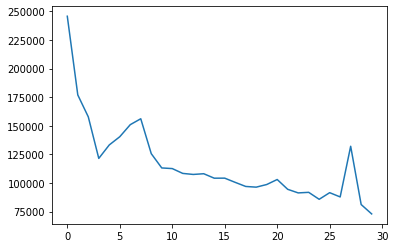

In [ ]:
plt.plot(spb_df.pivot_table(index = "cityCenter_km", values = "meter_price",aggfunc = "mean"))          #вывод графика по сводной таблице 
plt.show()

**Вывод**

На графике видно, что высокая стоимость квартир держится до расстояния в 7 километров от центра, далее цены идут на спад и не поднимаются. Следовательно сделаем вывод что центр города находится в пределах 7 километров.

**Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?**

Создадим переменную с таблицей квартир в Санкт-Петербурге и находящихся в центре.

In [ ]:
spb_center_df = spb_df.query("cityCenter_km <= 7")                                   #группировка квартир в пределах 7 километров

Выведем значения столбца 'total_area'.

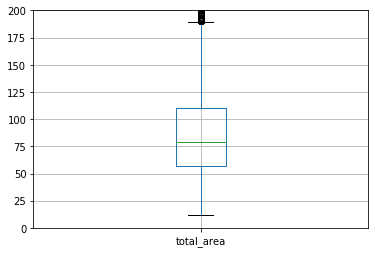

In [ ]:
plt.ylim(0,200)
spb_center_df.boxplot("total_area")                                    # диаграмма размаха

Диаграмма показывает, что нормальная площадь квартир в центре города от 65 до 110 кв.м.

Построим диаграмму для количества комнат.

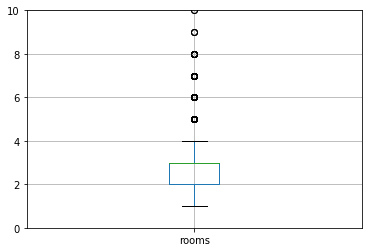

In [ ]:
plt.ylim(0,10)
spb_center_df.boxplot("rooms")                                               # диаграмма размаха

Страндартное число комнат в квартирах 2-3.

Построим диаграмму для высоты потолков.

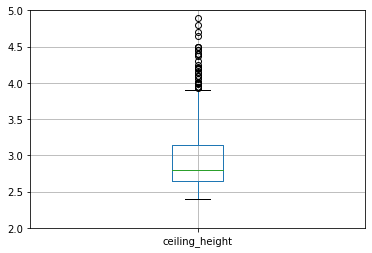

In [ ]:
plt.ylim(2,5)
spb_center_df.boxplot("ceiling_height")                                           # диаграмма размаха

Высота потолков в квартирах составляет 2.6 - 3.3 метров.

Построим диаграмму для цены.

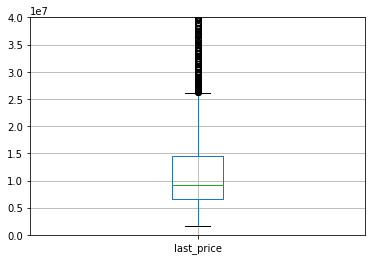

In [ ]:
plt.ylim(0,40000000)
spb_center_df.boxplot("last_price")                                                # диаграмма размаха

Цена на квартиры в центре в среднем от 7 миллионов до 15.

Постостроим матрицу диаграмм рассеивания для числа комнат, этажей, удалённости от центра и ценой.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca6f9724d0>,
      dtype=object)

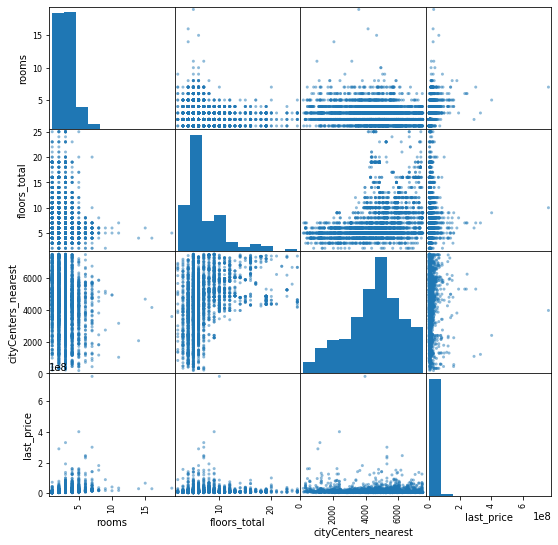

In [ ]:
pd.plotting.scatter_matrix(spb_center_df[["rooms","floors_total","cityCenters_nearest","last_price"]], figsize = (9,9))   #вызов матрици диаграмм размаха

На диаграммах видно что зависимости между ценой и другими показателями слабая или отсутствует. 
Проверим это через метод  'corr()'.

In [ ]:
spb_center_df[["rooms","floors_total","cityCenters_nearest","last_price"]].corr()                      #проверка корреляции

,rooms,floors_total,cityCenters_nearest,last_price
rooms,1.000000,-0.186130,-0.170991,0.315704
floors_total,-0.186130,1.000000,0.369163,0.033181
cityCenters_nearest,-0.170991,0.369163,1.000000,-0.042318
last_price,0.315704,0.033181,-0.042318,1.000000


**Вывод**

Квартиры в центре Санкт-Петербурга высотой потолков, повышенной площадью, и большой ценой. Количество комнат не сильно разнится с показателями общей массы квартир. Число комнат, удаленность, этажность имеют слабую зависимость с ценой. 

## Общий вывод

Исследуемом датафрейм изначально содержал пропуски, аномальноые значения, и несоответствие типов данных. В ходе предобработки было применнено заполнение пропусков в столбцах, где это было необходимо и оправдано, также были удалены пропуски которые нельзя было заполнить подходящими значениями. Некоторые пропуски не содержали значений по причине отсутствия характеристики объекта. Несоответствие типов данных могло возникнуть при копировании или при пропусках в столбцах, или изначально были записаны в неправильном формате.

Если рассматривать весь датасет по всем городам то на рынке преобладают 1-3 комнатные квартиры с высотой потолков 2.5 -2.8 метров, площадью 30 -50   и в ценовом диапазоне от 3 до 5 миллионов. Нормальная сдача таких квартир от 45 до 230 дней. На цену квартиы большее влияние имеет её площадь.

В ходе подсчета количества объявлений по городам видно что Санкт-Петербург занимает первое место, он также является городом с минимальной и максимальной ценой за квартиру.

При оценке квартир в Санкт-Петербурге была выявлена область в 7 километров которую можно обозначить как центр. Характерная черта квартир в центре 2-3 комнаты, 65- 110 метров квадратных, высота потолков 2.5 - 3.3 метра и стоимостью 7 -15 миллионов.

В процессе работы над датасетом рекомендуется использовать пошаговый принцип решения поставленных задач. Для получнегия ожидаемых, правильных выводов необходимо правильно обработать зачения в датасете и привести их к нужному формату. При дальнейшей работе с данными это не приведет к возникновению ошибок и ускорит процесс работы.
Также необходимо уметь подбирать методы для графического вывода данных, чтобы они они наглядно показывали наличие завсимостей или их отсутствие. 